* [CONTEXT](#1-bullet)
* [EXPLORATORY DATA ANALYSIS](#2-bullet)
    * [Variables' Names Overview and Their Description](#3-bullet)
    * [First takeaway from the data](#4-bullet)
    * [Getting more insights into numerical variables](#5-bullet)
    * [First takeaways from numerical data](#6-bullet)
    * [Distribution of labels](#7-bullet)
    * [Distribution of continouos variables](#8-bullet)
    * [Distribution of other numerical variables](#9-bullet)
    * [Getting more insights into categorical variables](#10-bullet)
    * [Distribution of categorical variables](#11-bullet)
    * [Takeaways from categorical data](#12-bullet)
    * [How the customers' demographic reatures do contribute to a purchase conversion?](#13-bullet)
    * [Takeaways from customer demographic features contributing to the purchase conversion](#14-bullet)
    * [Let's have a look into coralation between all variables](#15-bullet)
    * [Missing values within all variables for future fixing](#16-bullet)
* [PREPROCESSING AND SPLITTING THE DATA](#17-bullet)
    * [Spliting the data](#18-bullet)
    * [Preprocessing data in pipeline](#19-bullet)
    * [Combining all transformers together](#20-bullet)
* [TRAINING THE ALGORITHMS](#21-bullet)
    * [First approach](#22-bullet)
    * [Second approach](#23-bullet)
    * [Third approach](#24-bullet)
    * [Fourth approach](#25-bullet)
* [CONCLUSION](#26-bullet)
    * [Recommendations related to the target group](#27-bullet)
    * [Comparision of best algorithms and their metrics](#28-bullet)
    * [Takeaways from the models](#29-bullet)

# CONTEXT<a class="anchor" id="1-bullet"></a>
This project is based on the Kaggle data coming from a travel company called ‘Let’s Travel’  selling travel packages. The company is looking to expand their business by introducing a new travel package. There is a huge marketing campaign planned for the launch of the new product however their aim is also to optimize their marketing spends by approaching customers with higher probability to purchase the new package. So far their marketing spends were quite high because their reach out to customers via different communication channels (including paid marketing channels) was conducted on random target groups.  They are now looking for a data analyst to analyze their existing customer data to provide the recommendation and to predict the potential customers who are going to purchase their products. From the customer data collected through the past purchases, the company can classify its accessible audience consisting of potential purchasers into two categories: those who made the purchase vs. the rest.The aim of this project is therefore to build a machine learning model that predicts customers who are going to buy their product to approach them with the new campaign. 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import  metrics
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# EXPLORATORY DATA ANALYSIS<a class="anchor" id="2-bullet"></a>

In [2]:
data = pd.read_csv('Data/tour_package.csv')

### Variables' Names Overview and Their Description <a class="anchor" id="3-bullet"></a>

| Variable  | Description |
| :------------- | :------------- |
| **CUSTOMER DETAILS**
| CustomerID  | Unique customer ID  |
| ProdTaken  | Whether a customer has purchased a package or not (0: No, 1: Yes)  |
| Age  | Age of the customer  |
| CityTier  | Insights on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3  |
| Occupation  | Occupation of the customer  |
| Gender  | Gender of the customer  |
| NumberOfPersonVisiting  | Total number of all trip members going on one trip together  |
| MaritalStatus  | Marital status of the customer  |
| NumberOfTrips  | Average number of trips in a year by the customer  |
| Passport  | The customer has a passport or not (0: No, 1: Yes)  |
| OwnCar  | The customer owns a car or not (0: No, 1: Yes)  |
| NumberOfChildrenVisiting  | Total number of children with age less than 5 planning to take the trip with the customer  |
| Designation  | Designation of the customer in the current organization  |
| MonthlyIncome  | Gross monthly income of the customer  |
| **CUSTOMER INTERACTION DATA**
| TypeofContact  | How the customer was contacted (company invited or self inquiry)  |
| PreferredPropertyStar  | Preferred hotel property rating by the customer  |
| PitchSatisfactionScore  | Sales pitch satisfaction score |
| ProductPitched  | If a product pitched by a sales team |
| NumberOfFollowups  | The total number of follow-ups |
| DurationOfPitch  | Duration of a pitch |

In [3]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
data.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [6]:
data.shape

(4888, 20)

### First takeaway from the data <a class="anchor" id="4-bullet"></a>
There are 4888 observations and 20 variables (both numerical and categorical). One of the variables is the 'CustomerID' which doesn't have any impact on the purchase decisions therefore I will remove it from the data set now. 

In [7]:
data.drop(['CustomerID'], axis=1, inplace=True)

In [8]:
data.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [9]:
len(data)

4888

### Getting more insights into numerical variables <a class="anchor" id="3-bullet"></a>
There are 13 numerical variables in total and it's quite obvious that three of them (‘Age’, ‘DurationOfPitch’ and ‘MonthlyIncome’ are continuous quantitative variables but what about other ones? Let’s split all of them into different groups and have a deeper look into all of them. 

In [10]:
continuous_variables = []
below_2 = []
below_13 = []

for idx, value in data.dtypes.items():
    if value == 'float64' or value == 'int64':
        if len(data[idx].value_counts()) <3:
            below_2.append(idx)
        elif len(data[idx].value_counts()) < 13:
            below_13.append(idx)
        elif len(data[idx].value_counts()) < len(data):
            continuous_variables.append(idx)

for n in (below_2+below_13):
    print(f'{n}:\n\n{data[n].value_counts().sort_index()},\nNumber of missing values: {data[n].isnull().sum()}\n') 

ProdTaken:

0    3968
1     920
Name: ProdTaken, dtype: int64,
Number of missing values: 0

Passport:

0    3466
1    1422
Name: Passport, dtype: int64,
Number of missing values: 0

OwnCar:

0    1856
1    3032
Name: OwnCar, dtype: int64,
Number of missing values: 0

CityTier:

1    3190
2     198
3    1500
Name: CityTier, dtype: int64,
Number of missing values: 0

NumberOfPersonVisiting:

1      39
2    1418
3    2402
4    1026
5       3
Name: NumberOfPersonVisiting, dtype: int64,
Number of missing values: 0

NumberOfFollowups:

1.0     176
2.0     229
3.0    1466
4.0    2068
5.0     768
6.0     136
Name: NumberOfFollowups, dtype: int64,
Number of missing values: 45

PreferredPropertyStar:

3.0    2993
4.0     913
5.0     956
Name: PreferredPropertyStar, dtype: int64,
Number of missing values: 26

NumberOfTrips:

1.0      620
2.0     1464
3.0     1079
4.0      478
5.0      458
6.0      322
7.0      218
8.0      105
19.0       1
20.0       1
21.0       1
22.0       1
Name: NumberOfTrip

In [11]:
continuous_variables
binary_variables = below_2
descrete_variables = [x for x in below_13 if x.startswith('Number')]
ordinal_variables = [x for x in below_13 if x not in descrete_variables]

In [12]:
df_n = pd.DataFrame({'Type of variable': ['Continuous', 'Binary', 'Descrete', 'Ordinal'],
                     'Variable': [', '.join(continuous_variables), ', '.join(binary_variables), 
                                  ', '.join(descrete_variables), ', '.join(ordinal_variables)]})

df_n.style.set_properties(subset=['Variable'], **{'width': '500px'})

,Type of variable,Variable
0,Continuous,"Age, DurationOfPitch, MonthlyIncome"
1,Binary,"ProdTaken, Passport, OwnCar"
2,Descrete,"NumberOfPersonVisiting, NumberOfFollowups, NumberOfTrips, NumberOfChildrenVisiting"
3,Ordinal,"CityTier, PreferredPropertyStar, PitchSatisfactionScore"


### First takeaways from numerical data <a class="anchor" id="6-bullet"></a>
There are 4 types of variables represented by numers: continuous, discrete, binary and ordinal. 
'ProdTaken' constitutes labels for the data. There are missing values within 4 variables which will need to be fixed during the data preprocessing phase of this project. Let's have some visualisation to understand them better. 

### Distribution of labels <a class="anchor" id="7-bullet"></a>

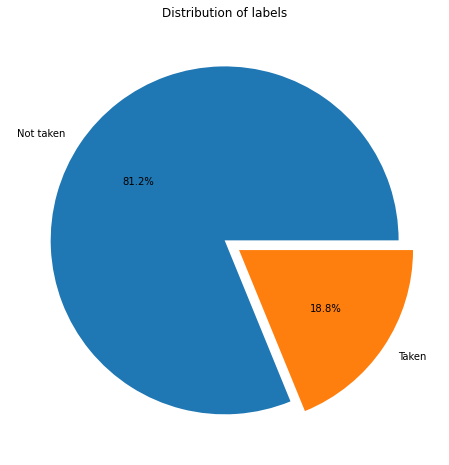

In [13]:
labels = 'Not taken', 'Taken'
sizes = list(pd.DataFrame(data.ProdTaken.value_counts()).ProdTaken)
explode = (0, 0.1)

fig1, ax1 = plt.subplots(figsize=(6, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of labels')
fig1.set_size_inches(16, 8)
plt.show()

### Distribution of continuous variables <a class="anchor" id="8-bullet"></a>

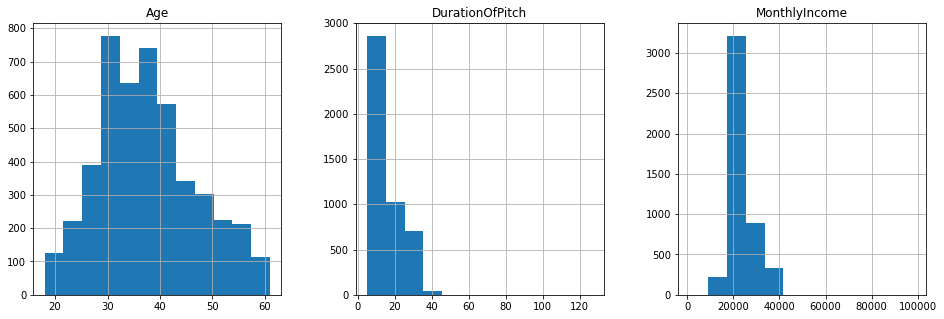

In [14]:
def plot_hist(data):
    data.hist(bins=12, figsize=(16, 5), layout=(1, 3))
    return plt.show()

plot_hist(data[continuous_variables])

Looking at the distribution of lables I can clearly say that almost 19% of observations belong to class 0 and 81% - to class 1. In this data set 81% of the customers did not end up making a purchase. That means that I will deal with the problem of imbalanced data which needs a special tactic to combat. 
'Age' has rather a normal distribution however looking at the distribution of 'DurationOfPitch' and 'MonthlyIncome' it's obvious that there are some extreme outliners in both of them. So let's check them.

In [15]:
print(f'No of observations with income higher than 45k: {len(data[data.MonthlyIncome >= 45000])}')
print(f'No of observations with income lower than 10k: {len(data[data.MonthlyIncome <= 10000])}')
        

No of observations with income higher than 45k: 2
No of observations with income lower than 10k: 2


This is such a small percentage which will have a rather bad impact on the classification algorithms, therefore I will remove them from the data. 

In [16]:
data.drop(data[data.MonthlyIncome >= 45000].index, inplace=True)
data.drop(data[data.MonthlyIncome <= 10000].index, inplace=True)

In [17]:
print(f'No of observations with Duration higher than 60: {len(data[data.DurationOfPitch >= 80])}')
print(f'No of observations with Duration lower than 5: {len(data[data.DurationOfPitch <= 5])}')

No of observations with Duration higher than 60: 2
No of observations with Duration lower than 5: 6


Also in this case the outliners will casue a noice which will have a bad impact on the alhorithms, therefore i will remove them too.

In [18]:
data.drop(data[data.DurationOfPitch >= 80].index, inplace=True)
data.drop(data[data.DurationOfPitch <= 5].index, inplace=True)

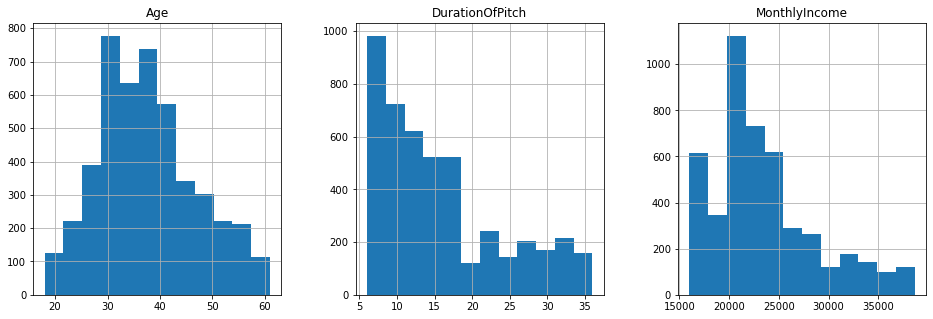

In [19]:
plot_hist(data[continuous_variables])

### Distribution of other numerical variables <a class="anchor" id="9-bullet"></a>

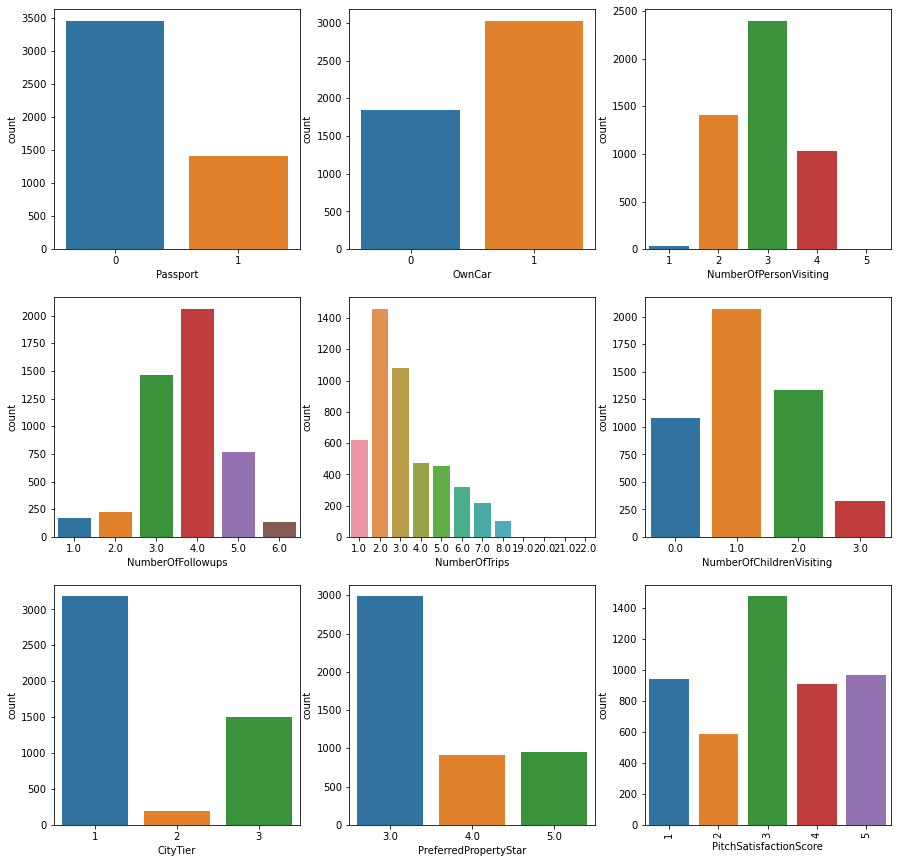

In [20]:
def bar_plot(category_list, rows, columns):
    fig, ax = plt.subplots(nrows=rows, ncols=columns, figsize=(15, 15))
    for variable, subplot in zip(category_list, ax.flatten()):
        sns.countplot(x=data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
    return plt.show()

other_numerical = binary_variables[1:]+ descrete_variables + ordinal_variables

bar_plot(other_numerical, 3, 3)

### Getting more insights into categorical variables <a class="anchor" id="10-bullet"></a>
There are 6 categorical variables in total, so let's have a deeper look into their classes and their missing values.

In [21]:
categorical_variables = []
for idx, value in data.dtypes.items():
    if value == 'object':
        categorical_variables.append(idx)
        
for n in categorical_variables:
    print(f'{n}:\n\n{data[n].value_counts()},\nNumber of missing values: {data[n].isnull().sum()}\n') 

TypeofContact:

Self Enquiry       3436
Company Invited    1415
Name: TypeofContact, dtype: int64,
Number of missing values: 25

Occupation:

Salaried          2360
Small Business    2082
Large Business     432
Free Lancer          2
Name: Occupation, dtype: int64,
Number of missing values: 0

Gender:

Male       2909
Female     1812
Fe Male     155
Name: Gender, dtype: int64,
Number of missing values: 0

ProductPitched:

Basic           1837
Deluxe          1729
Standard         740
Super Deluxe     342
King             228
Name: ProductPitched, dtype: int64,
Number of missing values: 0

MaritalStatus:

Married      2336
Divorced      947
Single        912
Unmarried     681
Name: MaritalStatus, dtype: int64,
Number of missing values: 0

Designation:

Executive         1837
Manager           1729
Senior Manager     740
AVP                342
VP                 228
Name: Designation, dtype: int64,
Number of missing values: 0



In [23]:
df_c = pd.DataFrame({'Variable': [categorical_variables[0], categorical_variables[1],
                                 categorical_variables[2], categorical_variables[3],
                                 categorical_variables[4], categorical_variables[5]],
                     'No of classes': [len(data.TypeofContact.value_counts()), len(data.Occupation.value_counts()), 
                                       len(data.Gender.value_counts()), len(data.ProductPitched.value_counts()),
                                       len(data.MaritalStatus.value_counts()),len(data.Designation.value_counts()) ]})
df_c

,Variable,No of classes
0,TypeofContact,2
1,Occupation,4
2,Gender,3
3,ProductPitched,5
4,MaritalStatus,4
5,Designation,5


### Distribution of categorical variables <a class="anchor" id="11-bullet"></a>

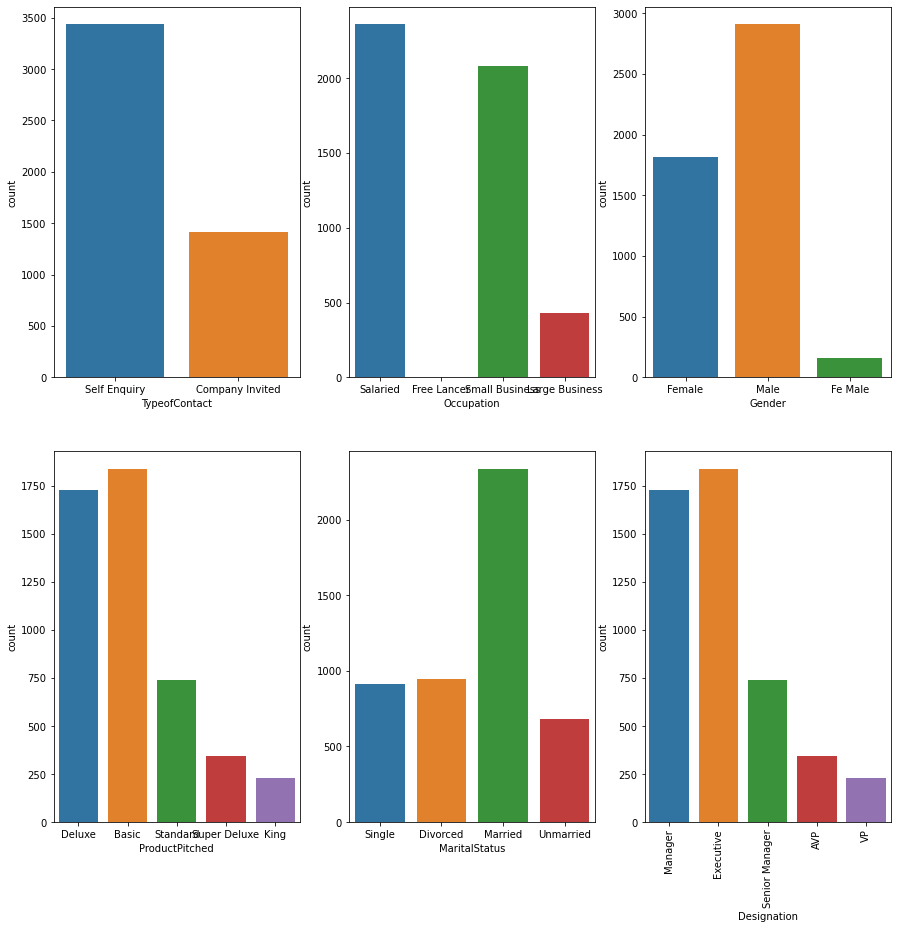

In [24]:
bar_plot(categorical_variables, 2, 3)

### Takeaways from categorical data <a class="anchor" id="12-bullet"></a>
'Gender' has an additional class caused by misspelled word 'Fe Male' which will be immediately fixed. Also 'Freelancer' class is misspelled which will be corrected now.'MaritalStatus has 2 classes meaning single - 'Single' and 'Unmarried'. I will therefore combine them together. 

In [25]:
data.loc[data['Gender'] == 'Fe Male', 'Gender'] = 'Female'
data.loc[data['MaritalStatus'] == 'Unmarried', 'MaritalStatus'] = 'Single'
data.loc[data['Occupation'] == 'Free Lancer', 'Occupation'] = 'Freelancer'

In [26]:
data.Gender.value_counts()

Male      2909
Female    1967
Name: Gender, dtype: int64

In [27]:
data.Gender.value_counts()

Male      2909
Female    1967
Name: Gender, dtype: int64

In [28]:
data.Occupation.value_counts()

Salaried          2360
Small Business    2082
Large Business     432
Freelancer           2
Name: Occupation, dtype: int64

### How the customers' demographic features do contribute to a purchase conversion? <a class="anchor" id="13-bullet"></a>

#### Age & Monthly income vs Sex contribution

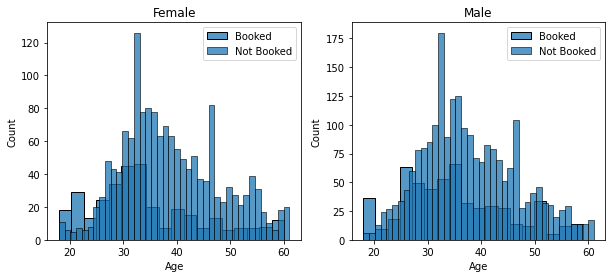

In [29]:
def check_continuous_variables_contribution(continuous):
    booked = 'Booked'
    not_booked = 'Not Booked'
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
    women = data[data['Gender']=='Female']
    men = data[data['Gender']=='Male']
    ax = sns.histplot(women[women['ProdTaken']==1][continuous].dropna(), bins=18, label = booked, ax = axes[0], kde =False)
    ax = sns.histplot(women[women['ProdTaken']==0][continuous].dropna(), bins=40, label = not_booked, ax = axes[0], kde =False)
    ax.legend()
    ax.set_title('Female')
    ax = sns.histplot(men[men['ProdTaken']==1][continuous].dropna(), bins=18, label = booked, ax = axes[1], kde = False)
    ax = sns.histplot(men[men['ProdTaken']==0][continuous].dropna(), bins=40, label = not_booked, ax = axes[1], kde = False)
    ax.legend()
    _ = ax.set_title('Male')
    return plt.show()

check_continuous_variables_contribution('Age')

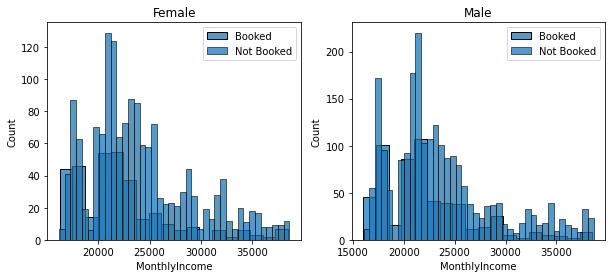

In [30]:
check_continuous_variables_contribution('MonthlyIncome')

#### City, Occupation, Marital status and Dedsignation contribution

In [31]:
def check_categorical_variables(data,x_variables,ax):
    num_x=len([x for x in data[x_variables].unique() if x==x])
    bars = ax.patches
    for ind in range(num_x):
        hue_bars = bars[ind:][::num_x]
        total = sum([x.get_height() for x in hue_bars])
        for bar in hue_bars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

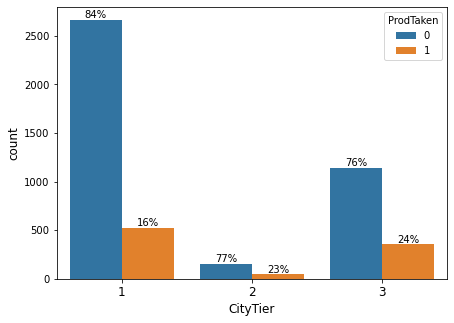

posx and posy should be finite values
posx and posy should be finite values


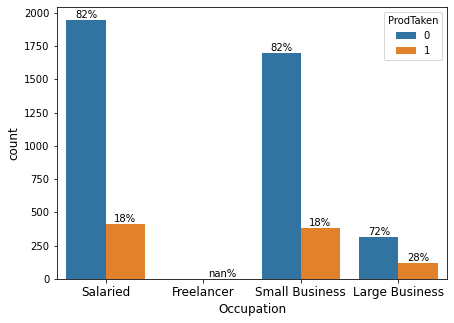

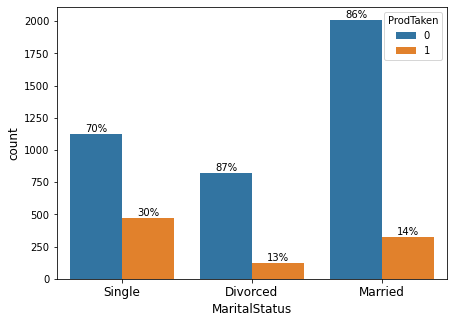

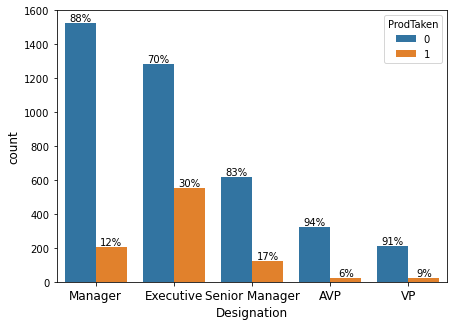

In [32]:
multiclass = ['CityTier', 'Occupation', 'MaritalStatus', 'Designation']
for c in multiclass: 
    plt.figure(figsize = (7, 5))
    ax = sns.countplot(x = c, hue = 'ProdTaken', data = data)
    plt.xticks(size=12)
    plt.xlabel(c, size = 12)
    plt.ylabel('count', size=12)

    check_categorical_variables(data, c, ax)

### Takeaways from customer demographic features contributing to the purchase conversion<a class="anchor" id="14-bullet"></a>

There is huge probability of purchase in the group of:
- women in the age between 25 and 35 earning about 17k and between 20k and 23k a month
- men in the age between 25 and 35 earning about 17k and between 20k and 23k a month

There is 'Freelancer' class in the 'Occupation' variable represented by 2 observations only, both belonging to the label 1 which causes an error in displaying the plot. Classes with higher conversion rate which can be used for recommendations while approaching customers are following:
- in the 'CityTier': CityTier 2 and CityTier 3 (23% and 24%)
- in the 'Occupation': Large Business (28%)
- in the 'MaritalStatus': Single (30%)
- in the 'Designation': Executive (30%)

### Let's have a look into coralation between all variables<a class="anchor" id="15-bullet"></a>

In [33]:
X = data.drop('ProdTaken', axis = 1)
y = data['ProdTaken'].copy()

<AxesSubplot:>

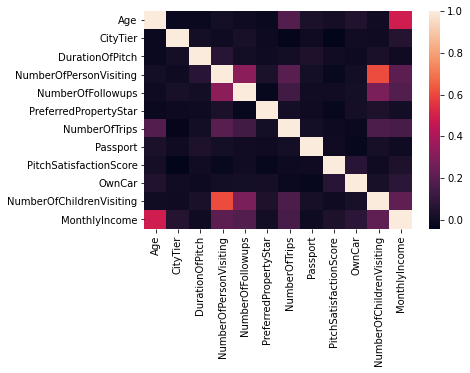

In [34]:
cor = X.corr()
sns.heatmap(cor, xticklabels=cor.columns,yticklabels=cor.columns)

There are following variables with a high corelation to consider not to include them into classification altorythm:
- 'NumberOfPersonVisiting' and 'NumberOfChildrenVisting' / I will work with 'NumberOfPersonVisiting'.
- 'Age' and 'MonthlyIncome' / I will work with 'Age' only. 

### Missing values within all variables for future fixing<a class="anchor" id="16-bullet"></a>

In [35]:
def missing_values_calculator(data):
    total = data.isnull().sum().sort_values(ascending=False)
    types = pd.Series([data[x].dtype for x in data.isnull().sum().index], index=data.columns)
    percent_1 = data.isnull().sum()/data.isnull().count()*100
    percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

    missing_data = pd.concat([total, percent_2, types], axis=1, keys=['Total', '%', 'Dtype'])
    return missing_data

missing_values_calculator(data)

,Total,%,Dtype
DurationOfPitch,251,5.1,float64
MonthlyIncome,232,4.8,float64
Age,224,4.6,float64
NumberOfTrips,140,2.9,float64
NumberOfChildrenVisiting,66,1.4,float64
NumberOfFollowups,45,0.9,float64
TypeofContact,25,0.5,object
PreferredPropertyStar,25,0.5,float64
Gender,0,0.0,object
CityTier,0,0.0,int64


# PREPROCESSING AND SPLITTING THE DATA<a class="anchor" id="17-bullet"></a>

In [36]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,37.0,Self Enquiry,1,8.0,Freelancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [37]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: ProdTaken, dtype: int64

In [38]:
X.shape

(4876, 18)

In [39]:
y.shape

(4876,)

### Spliting the data<a class="anchor" id="18-bullet"></a>

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [41]:
missing_values_calculator(X)

,Total,%,Dtype
DurationOfPitch,251,5.1,float64
MonthlyIncome,232,4.8,float64
Age,224,4.6,float64
NumberOfTrips,140,2.9,float64
NumberOfChildrenVisiting,66,1.4,float64
NumberOfFollowups,45,0.9,float64
PreferredPropertyStar,25,0.5,float64
TypeofContact,25,0.5,object
OwnCar,0,0.0,int64
PitchSatisfactionScore,0,0.0,int64


### Preprocessing data in pipeline<a class="anchor" id="19-bullet"></a>

#### Creating DataFrameSelector

In [42]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names]

#### Imputer strategy for numerical variables selection

In [43]:
mean_v = []
median_v = []
min_v = []
max_v = []
skew_v = []
kurtosis_v = []

for c in continuous_variables:
    mean_v.append(round(X[c].mean(), 2))
    median_v.append(round(X[c].median(), 2))
    min_v.append(round(X[c].min(), 2))
    max_v.append(round(X[c].max(), 2))
    skew_v.append(round(X[c].skew(), 2))
    kurtosis_v.append(round(X[c].kurtosis(), 2))

In [44]:
mean_v = pd.Series(mean_v, index=continuous_variables)
median_v = pd.Series(median_v, index=continuous_variables)
min_v = pd.Series(min_v, index=continuous_variables)
max_v = pd.Series(max_v, index=continuous_variables)
skew_v = pd.Series(skew_v, index=continuous_variables)
kurtosis_v = pd.Series(kurtosis_v, index=continuous_variables)

In [45]:
missing_continuous_overview = pd.concat([mean_v, median_v, min_v, max_v, skew_v, kurtosis_v], 
                                        axis=1, 
                                        keys=['Mean', 'Median', 'Min', 'Max', 'Skewness', 'Kurtosis'])
missing_continuous_overview

,Mean,Median,Min,Max,Skewness,Kurtosis
Age,37.62,36.0,18.0,61.0,0.38,-0.45
DurationOfPitch,15.46,13.0,6.0,36.0,0.91,-0.25
MonthlyIncome,23594.80,22347.0,16009.0,38677.0,1.03,0.53


If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed. There is one variables with pritty much normal distribution ('Age) and one variable with moderate skewness. For the simplicity reasons I will use the median strategy for both of them. 'MonthlyIncome' won't be included as corelated with 'Age'.  

I will also use most frequent strategy for binary, descrete or ordinal variables. 'NumberOfChildrenVisiting' won't be included as correlated with 'NumberOfPersonVisting'. 

#### Creating Pipelines for all types of numerical variables

In [46]:
median_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(['Age', 'DurationOfPitch'])),
        ("imputer", SimpleImputer(strategy="median")),
    ])

In [47]:
most_frequent_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(['Passport', 'OwnCar', 'NumberOfPersonVisiting', 'NumberOfFollowups',
                                              'NumberOfTrips', 'CityTier', 'PreferredPropertyStar',
                                              'PitchSatisfactionScore'])),
        ("imputer", SimpleImputer(strategy='most_frequent')),
    ])

#### Creating imputer and encoding categorical data

In [48]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [49]:
one_hot_encoder_pipeline = Pipeline([
        ('select_cat', DataFrameSelector(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus',
                                           'Designation'])),
        ('at_encoder', OneHotEncoder(sparse=False, handle_unknown = 'ignore')),
    ])

### Combining all transformers together<a class="anchor" id="20-bullet"></a>

In [50]:
preprocess_pipeline = FeatureUnion(transformer_list=[
        ('median_pipeline', median_pipeline),
        ('most_frequent_pipeline', most_frequent_pipeline),
        ('one_hot_encoder_pipeline', one_hot_encoder_pipeline)
    ])

# TRAINING THE ALGORITHMS 

I initially tested all popular algorithms that can be used for a binary classification (Logistic Regression, k-Nearest Neighbors, Decision Trees, Random Forest, Extra Tree, SVM and Naive Bayes) however because the initial metrics were slightly better for Decision Tree, Random Forest, Extra Tree and SVM (both linear SVC and SVC) then i decided to work with these 5 ones.

Also I decided to test all of them with scaled data too even if tree-based algorithms are fairly insensitive to the scale of variables. 

### First approach<a class="anchor" id="22-bullet"></a>
- using all variables apart from two highly correlated ('NumberofChildrenVisting' and 'MonthlyIncome' have been dropped)
- scaling the data with StanardScaler
- using SMOTE for oversampling 

In [51]:
seed=123
kfold = StratifiedKFold(n_splits=5)

In [52]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('scaler', StandardScaler()),
    ('over', SMOTE()),
    ('classifier', SVC(kernel='linear'))])


param_grid = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__gamma': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold, n_jobs=-1)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'classifier__C': 100, 'classifier__gamma': 0.1}

In [54]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline), 
    ('scaler', StandardScaler()),
    ('over', SMOTE()),
    ('classifier', LinearSVC())])


param_grid = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_2 = GridSearchCV(pipe, param_grid, cv=kfold, n_jobs=-1)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__C': 0.01}

In [55]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('scaler', StandardScaler()),
    ('over', SMOTE()),
    ('classifier', DecisionTreeClassifier())])


param_grid = {'classifier__min_samples_leaf': [1, 10, 25, 50, 100]}
            

grid_3 = GridSearchCV(pipe, param_grid, cv=kfold, n_jobs=-1)

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'classifier__min_samples_leaf': 1}

In [56]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline), 
    ('scaler', StandardScaler()),
    ('over', SMOTE()),
    ('classifier', RandomForestClassifier())])


param_grid = {'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
             'classifier__min_samples_leaf':  [1, 10, 25, 50, 100],
             }
            

grid_4 = GridSearchCV(pipe, param_grid, cv=kfold, n_jobs=-1)

grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__max_depth': 80, 'classifier__min_samples_leaf': 1}

In [62]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('scaler', StandardScaler()),
    ('over', SMOTE()),
    ('classifier', ExtraTreesClassifier())])

param_grid = {'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
             'classifier__min_samples_leaf':  [1, 10, 25, 50, 100],
             }


grid_5 = GridSearchCV(pipe, param_grid, cv=kfold, n_jobs=-1)
grid_5.fit(X_train, y_train)
grid_5.best_params_

{'classifier__max_depth': 70, 'classifier__min_samples_leaf': 1}

In [151]:
def list_models_metrics(algorithms_names, grids_best_estimator_):
    
    models = list(zip(algorithms_names, grids_best_estimator_))
    return models

In [153]:
def list_models_metrics(algorithms_names, grids_best_estimator_):
    
    models = list(zip(algorithms_names, grids_best_estimator_))
    
    precision_score = []
    recall_score = []
    f1_score = []
    accuracy_score = []
    
    for name, model in models:
        print(name)
        print('precision_score: {}'.format(metrics.precision_score(y_test, model.predict(X_test)) ))
        print('recall_score: {}'.format( metrics.recall_score(y_test, model.predict(X_test)) ))
        print('f1_score: {}'.format( metrics.f1_score(y_test, model.predict(X_test)) ))
        print('accuracy_score: {}'.format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
        precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
        recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
        f1_score.append( metrics.f1_score(y_test, model.predict(X_test)))
        accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))
        
    dictionary = {'precision_score': precision_score, 
                  'recall_score': recall_score, 
                  'f1_score': f1_score,
                  'accuracy_score' : accuracy_score}
    
    df = pd.DataFrame(data=dictionary)
    df.insert(loc=0, column='Method', value=algorithms_names)
    return df


In [154]:
list_models_metrics(['SVM EBF','SVM linear', 'DTC', 'RFC', 'ETC'], 
                    [grid_1.best_estimator_, grid_2.best_estimator_,grid_3.best_estimator_,
                    grid_4.best_estimator_, grid_5.best_estimator_])

SVM EBF
precision_score: 0.4144144144144144
recall_score: 0.75
f1_score: 0.5338491295938105
accuracy_score: 0.7530737704918032
SVM linear
precision_score: 0.40988372093023256
recall_score: 0.7663043478260869
f1_score: 0.5340909090909091
accuracy_score: 0.7479508196721312
DTC
precision_score: 0.7244897959183674
recall_score: 0.7717391304347826
f1_score: 0.7473684210526316
accuracy_score: 0.9016393442622951
RFC
precision_score: 0.9166666666666666
recall_score: 0.717391304347826
f1_score: 0.8048780487804877
accuracy_score: 0.9344262295081968
ETC
precision_score: 0.9567901234567902
recall_score: 0.842391304347826
f1_score: 0.8959537572254336
accuracy_score: 0.9631147540983607


,Method,precision_score,recall_score,f1_score,accuracy_score
0,SVM EBF,0.414414,0.750000,0.533849,0.753074
1,SVM linear,0.409884,0.766304,0.534091,0.747951
2,DTC,0.724490,0.771739,0.747368,0.901639
3,RFC,0.916667,0.717391,0.804878,0.934426
4,ETC,0.956790,0.842391,0.895954,0.963115


### Second approach <a class="anchor" id="23-bullet"></a>
- finding important features with CHI2 (transforming categorical data to ordinal ones and using SelectBest method for selection of the best variables) 
- reducing the number of variables to ten used for training algorithms 

In [87]:
data_num = X.copy().fillna(1)
data_num.drop(['MonthlyIncome', 'NumberOfChildrenVisiting'], axis=1, inplace=True)
for c in categorical_variables:
    data_num[c] = data_num[c].astype('category').cat.codes
data_num.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation
0,41.0,2,3,6.0,2,0,3,3.0,1,3.0,2,1.0,1,2,1,2
1,49.0,1,1,14.0,2,1,3,4.0,1,4.0,0,2.0,0,3,1,2
2,37.0,2,1,8.0,0,1,3,4.0,0,3.0,2,7.0,1,3,0,1
3,33.0,1,1,9.0,2,0,2,3.0,0,3.0,0,2.0,1,5,1,1
4,1.0,2,1,8.0,3,1,2,3.0,0,4.0,0,1.0,0,5,1,1


In [88]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
list_one =[]
feature_ranking = SelectKBest(chi2, k=5)
fit = feature_ranking.fit(data_num, y)

for i, (score, feature) in enumerate(zip(feature_ranking.scores_, data_num.columns)):
    list_one.append((score, feature))
    
dfObj = pd.DataFrame(list_one) 
dfObj.sort_values(by=[0], ascending = False)

,0,1
0,243.831179,Age
12,236.805803,Passport
8,174.988202,ProductPitched
3,146.820851,DurationOfPitch
10,59.418514,MaritalStatus
15,24.561240,Designation
2,18.739539,CityTier
7,16.646631,NumberOfFollowups
9,8.153316,PreferredPropertyStar
13,7.828429,PitchSatisfactionScore


I will go with 10 variables only: 'Age', 'Passport', 'ProductPitched', 'DurationOfPitch', 'MaritalStatus', 'Designation', 'CityTier', 'NumberOfFollowups', 'PreferredPropertyStar' and PitchSatisfactionScore.

#### Creating Pipelines for important variables only

In [89]:
median_pipeline_2 = Pipeline([
        ("select_numeric", DataFrameSelector(['Age', 'DurationOfPitch'])),
        ("imputer", SimpleImputer(strategy="median")),
    ])   

In [90]:
most_frequent_pipeline_2 = Pipeline([
        ("select_numeric", DataFrameSelector(['Passport', 'CityTier', 'NumberOfFollowups', 'PreferredPropertyStar',
                                              'PitchSatisfactionScore'])),
        ("imputer", SimpleImputer(strategy='most_frequent')),
    ])

In [91]:
one_hot_encoder_pipeline_2 = Pipeline([
        ('select_cat', DataFrameSelector(['ProductPitched','MaritalStatus','Designation' ])),
        ('at_encoder', OneHotEncoder(sparse=False, handle_unknown = 'ignore')),
    ])

In [92]:
preprocess_pipeline_2 = FeatureUnion(transformer_list=[
        ('median_pipeline', median_pipeline),
        ('most_frequent_pipeline', most_frequent_pipeline),
        ('one_hot_encoder_pipeline', one_hot_encoder_pipeline)
    ])

#### Training algorithms with important variables only

In [93]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline_2),
    ('scaler', StandardScaler()),
    ('over', SMOTE()),
    ('classifier', SVC(kernel='linear'))])


param_grid = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__gamma': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
}

grid_6 = GridSearchCV(pipe, param_grid, cv=kfold, n_jobs=-1)

grid_6.fit(X_train, y_train)
grid_6.best_params_

{'classifier__C': 100, 'classifier__gamma': 10}

In [95]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline_2), 
    ('scaler', StandardScaler()),
    ('over', SMOTE()),
    ('classifier', LinearSVC())])


param_grid = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_7 = GridSearchCV(pipe, param_grid, cv=kfold, n_jobs=-1)

grid_7.fit(X_train, y_train)
grid_7.best_params_

{'classifier__C': 0.1}

In [96]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline_2),
    ('scaler', StandardScaler()),
    ('over', SMOTE()),
    ('classifier', DecisionTreeClassifier())])


param_grid = {'classifier__min_samples_leaf': [1, 10, 25, 50, 100]}
            

grid_8 = GridSearchCV(pipe, param_grid, cv=kfold, n_jobs=-1)

grid_8.fit(X_train, y_train)
grid_8.best_params_

{'classifier__min_samples_leaf': 1}

In [97]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline_2), 
    ('scaler', StandardScaler()),
    ('over', SMOTE()),
    ('classifier', RandomForestClassifier())])


param_grid = {'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
             'classifier__min_samples_leaf':  [1, 10, 25, 50, 100],
             }
            

grid_9 = GridSearchCV(pipe, param_grid, cv=kfold, n_jobs=-1)

grid_9.fit(X_train, y_train)
grid_9.best_params_

{'classifier__max_depth': 70, 'classifier__min_samples_leaf': 1}

In [98]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline_2),
    ('scaler', StandardScaler()),
    ('over', SMOTE()),
    ('classifier', ExtraTreesClassifier())])

param_grid = {'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
             'classifier__min_samples_leaf':  [1, 10, 25, 50, 100],
             }


grid_10 = GridSearchCV(pipe, param_grid, cv=kfold, n_jobs=-1)
grid_10.fit(X_train, y_train)
grid_10.best_params_

{'classifier__max_depth': 70, 'classifier__min_samples_leaf': 1}

In [155]:
list_models_metrics(['SVM EBF WITH DR', 'SVM linear WITH DR','DTC WITH DR', 'RFC WITH DR', 'ETC WITH DR'], 
                    [grid_6.best_estimator_, grid_7.best_estimator_,grid_8.best_estimator_,
                     grid_9.best_estimator_, grid_10.best_estimator_])

SVM EBF WITH DR
precision_score: 0.4212121212121212
recall_score: 0.7554347826086957
f1_score: 0.5408560311284046
accuracy_score: 0.7581967213114754
SVM linear WITH DR
precision_score: 0.3976945244956772
recall_score: 0.75
f1_score: 0.5197740112994351
accuracy_score: 0.7387295081967213
DTC WITH DR
precision_score: 0.7295918367346939
recall_score: 0.7771739130434783
f1_score: 0.7526315789473684
accuracy_score: 0.9036885245901639
RFC WITH DR
precision_score: 0.8958333333333334
recall_score: 0.7010869565217391
f1_score: 0.7865853658536586
accuracy_score: 0.9282786885245902
ETC WITH DR
precision_score: 0.9634146341463414
recall_score: 0.8586956521739131
f1_score: 0.9080459770114943
accuracy_score: 0.9672131147540983


,Method,precision_score,recall_score,f1_score,accuracy_score
0,SVM EBF WITH DR,0.421212,0.755435,0.540856,0.758197
1,SVM linear WITH DR,0.397695,0.750000,0.519774,0.738730
2,DTC WITH DR,0.729592,0.777174,0.752632,0.903689
3,RFC WITH DR,0.895833,0.701087,0.786585,0.928279
4,ETC WITH DR,0.963415,0.858696,0.908046,0.967213


### Third approach<a class="anchor" id="24-bullet"></a>
- dropping SVM as still achieving worse results 
- dropping scaling for tree-based algorithms 

In [130]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline_2),
    ('over', SMOTE()),
    ('classifier', DecisionTreeClassifier())])


param_grid = {'classifier__min_samples_leaf': [1, 10, 25, 50, 100]}
            

grid_11 = GridSearchCV(pipe, param_grid, cv=kfold, n_jobs=-1)

grid_11.fit(X_train, y_train)
grid_11.best_params_

{'classifier__min_samples_leaf': 1}

In [131]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline_2), 
    ('over', SMOTE()),
    ('classifier', RandomForestClassifier())])


param_grid = {'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
             'classifier__min_samples_leaf':  [1, 10, 25, 50, 100],
             }
            

grid_12 = GridSearchCV(pipe, param_grid, cv=kfold, n_jobs=-1)

grid_12.fit(X_train, y_train)
grid_12.best_params_

{'classifier__max_depth': 70, 'classifier__min_samples_leaf': 1}

In [132]:
from sklearn.ensemble import ExtraTreesClassifier
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline_2),
    ('over', SMOTE()),
    ('classifier', ExtraTreesClassifier())])

param_grid = {'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
             'classifier__min_samples_leaf':  [1, 10, 25, 50, 100],
             }


grid_13 = GridSearchCV(pipe, param_grid, cv=kfold, n_jobs=-1)
grid_13.fit(X_train, y_train)
grid_13.best_params_

{'classifier__max_depth': 50, 'classifier__min_samples_leaf': 1}

In [157]:
list_models_metrics(['DTC without SC', 'RFC without SC', 'ETC without SC'], 
                    [grid_11.best_estimator_, grid_12.best_estimator_,grid_13.best_estimator_])

DTC without SC
precision_score: 0.7828282828282829
recall_score: 0.842391304347826
f1_score: 0.8115183246073299
accuracy_score: 0.9262295081967213
RFC without SC
precision_score: 0.9435483870967742
recall_score: 0.6358695652173914
f1_score: 0.7597402597402597
accuracy_score: 0.9241803278688525
ETC without SC
precision_score: 0.961038961038961
recall_score: 0.8043478260869565
f1_score: 0.8757396449704141
accuracy_score: 0.9569672131147541


,Method,precision_score,recall_score,f1_score,accuracy_score
0,DTC without SC,0.782828,0.842391,0.811518,0.926230
1,RFC without SC,0.943548,0.635870,0.759740,0.924180
2,ETC without SC,0.961039,0.804348,0.875740,0.956967


### Fourth approach<a class="anchor" id="25-bullet"></a>
- dropping SMOTE method 

In [139]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline_2),
    ('classifier', DecisionTreeClassifier())])


param_grid = {'classifier__min_samples_leaf': [1, 10, 25, 50, 100]}
            

grid_14 = GridSearchCV(pipe, param_grid, cv=kfold, n_jobs=-1)

grid_14.fit(X_train, y_train)
grid_14.best_params_

{'classifier__min_samples_leaf': 1}

In [140]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline_2), 
    ('classifier', RandomForestClassifier())])


param_grid = {'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
             'classifier__min_samples_leaf':  [1, 10, 25, 50, 100],
             }
            

grid_15 = GridSearchCV(pipe, param_grid, cv=kfold, n_jobs=-1)

grid_15.fit(X_train, y_train)
grid_15.best_params_

{'classifier__max_depth': 40, 'classifier__min_samples_leaf': 1}

In [141]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline_2),
    ('classifier', ExtraTreesClassifier())])

param_grid = {'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
             'classifier__min_samples_leaf':  [1, 10, 25, 50, 100],
             }


grid_16 = GridSearchCV(pipe, param_grid, cv=kfold, n_jobs=-1)
grid_16.fit(X_train, y_train)
grid_16.best_params_

{'classifier__max_depth': 40, 'classifier__min_samples_leaf': 1}

In [158]:
list_models_metrics(['DTC without SMOTE', 'RFC without SMOTE', 'ETC without SMOTE'], 
                    [grid_14.best_estimator_, grid_15.best_estimator_,grid_16.best_estimator_])

DTC without SMOTE
precision_score: 0.8225806451612904
recall_score: 0.8315217391304348
f1_score: 0.8270270270270271
accuracy_score: 0.9344262295081968
RFC without SMOTE
precision_score: 0.9782608695652174
recall_score: 0.7336956521739131
f1_score: 0.8385093167701865
accuracy_score: 0.9467213114754098
ETC without SMOTE
precision_score: 0.9802631578947368
recall_score: 0.8097826086956522
f1_score: 0.8869047619047619
accuracy_score: 0.9610655737704918


,Method,precision_score,recall_score,f1_score,accuracy_score
0,DTC without SMOTE,0.822581,0.831522,0.827027,0.934426
1,RFC without SMOTE,0.978261,0.733696,0.838509,0.946721
2,ETC without SMOTE,0.980263,0.809783,0.886905,0.961066


# CONCLUSION <a class="anchor" id="26-bullet"></a>

### Recommendations related to the target group <a class="anchor" id="27-bullet"></a>
It’s highly possible to reduce the company’s  marketing spends by approaching a more curated target group with higher conversion probability with following demographic features:
- Single women and men
- Aged between 25 and 35
- Earning about 17k or between 20k and 23k a month
- Leaving in cities from tier 2 and tier 3
- Working in Large Business as an Executive or Senior Manager 

### Comparision of the best algorithms and their metrics <a class="anchor" id="28-bullet"></a>

In [159]:
final_comparision = list_models_metrics(['SVM EBF','SVM linear', 'DTC', 'RFC', 'ETC', 
                                         'SVM EBF WITH DR', 'SVM linear WITH DR','DTC WITH DR', 'RFC WITH DR', 'ETC WITH DR',
                                         'DTC without SC', 'RFC without SC', 'ETC without SC',
                                         'DTC without SMOTE', 'RFC without SMOTE', 'ETC without SMOTE'], 
                                        [grid_1.best_estimator_, grid_2.best_estimator_,grid_3.best_estimator_,
                                         grid_4.best_estimator_, grid_5.best_estimator_,
                                         grid_6.best_estimator_, grid_7.best_estimator_,grid_8.best_estimator_,
                                         grid_9.best_estimator_, grid_10.best_estimator_,
                                         grid_11.best_estimator_, grid_12.best_estimator_,grid_13.best_estimator_,
                                         grid_14.best_estimator_, grid_15.best_estimator_,grid_16.best_estimator_,])

SVM EBF
precision_score: 0.4144144144144144
recall_score: 0.75
f1_score: 0.5338491295938105
accuracy_score: 0.7530737704918032
SVM linear
precision_score: 0.40988372093023256
recall_score: 0.7663043478260869
f1_score: 0.5340909090909091
accuracy_score: 0.7479508196721312
DTC
precision_score: 0.7244897959183674
recall_score: 0.7717391304347826
f1_score: 0.7473684210526316
accuracy_score: 0.9016393442622951
RFC
precision_score: 0.9166666666666666
recall_score: 0.717391304347826
f1_score: 0.8048780487804877
accuracy_score: 0.9344262295081968
ETC
precision_score: 0.9567901234567902
recall_score: 0.842391304347826
f1_score: 0.8959537572254336
accuracy_score: 0.9631147540983607
SVM EBF WITH DR
precision_score: 0.4212121212121212
recall_score: 0.7554347826086957
f1_score: 0.5408560311284046
accuracy_score: 0.7581967213114754
SVM linear WITH DR
precision_score: 0.3976945244956772
recall_score: 0.75
f1_score: 0.5197740112994351
accuracy_score: 0.7387295081967213
DTC WITH DR
precision_score: 0.7

In [161]:
final_comparision.sort_values(['f1_score'], ascending=False)

,Method,precision_score,recall_score,f1_score,accuracy_score
9,ETC WITH DR,0.963415,0.858696,0.908046,0.967213
4,ETC,0.956790,0.842391,0.895954,0.963115
15,ETC without SMOTE,0.980263,0.809783,0.886905,0.961066
12,ETC without SC,0.961039,0.804348,0.875740,0.956967
14,RFC without SMOTE,0.978261,0.733696,0.838509,0.946721
13,DTC without SMOTE,0.822581,0.831522,0.827027,0.934426
10,DTC without SC,0.782828,0.842391,0.811518,0.926230
3,RFC,0.916667,0.717391,0.804878,0.934426
8,RFC WITH DR,0.895833,0.701087,0.786585,0.928279
11,RFC without SC,0.943548,0.635870,0.759740,0.924180


### Takeaways from the models <a class="anchor" id="29-bullet"></a>
Being able to predict the target group, who is going to convert would prove to be beneficial for the company because it would mean to approach the customers with the highest probability of conversion. Looking at the tested algorithms I can say that it is possible to predict a customer buying behavior with nearly 97% of accuracy,  96% of precision and 85% of sensitivity. Obviously precision score and recall score are more important for this exercise because the first one answers the question how many customers labeled as ‘ProdTaken’  actually purchased the package and the second one - of all the customers that truly purchased the package - how many the algorithm labeled as 'ProdTaken'. 

It would be however difficult to provide a recommendation or to build an algorithm to predict the purchase of a product with some predefined features because there are limitations in the data. For future improvement of recommendations and algorithms the additional data could be collected. Possible features to add in the future are: customers’ preferences, no of trips a year, type of holidays.